In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
kmeans = pd.read_parquet('../data/sas/mart/kmeans.parquet')
rfm = pd.read_parquet('../data/sas/mart/rfm.parquet')

In [8]:
mart = pd.read_parquet('../data/sas/mart/data_mart.parquet')

In [9]:
ids = kmeans.index.intersection(mart.index)

In [10]:
mart = pd.merge(mart.loc[ids], kmeans, on='phone')

In [11]:
categories = ['related products', 'office goods', 'breastfeeding products',
             'textile, knitwear', 'footwear', 'toys', 'women things',
             'goods for pets', 'cosmetics and hygiene', 'diapers']

In [12]:
cat_stats = mart.groupby('k_means')[categories].mean()

In [13]:
cat_stats = (cat_stats.T / cat_stats.sum(axis=1)).T

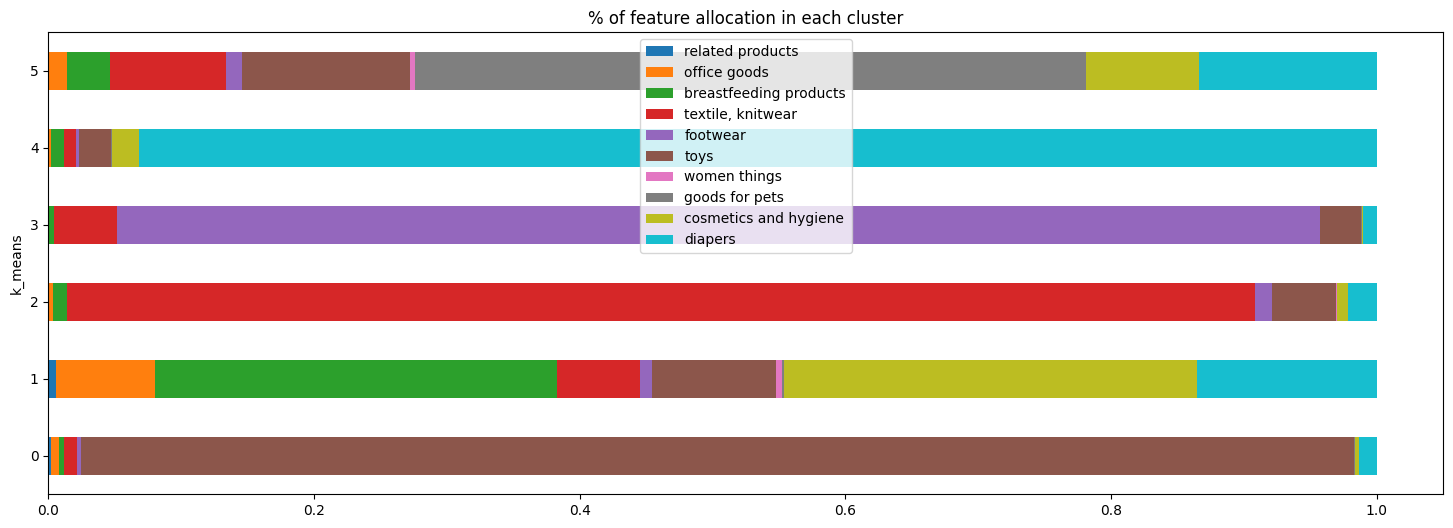

In [15]:
cat_stats.plot.barh(figsize=(18, 6), stacked=True); plt.title('% of feature allocation in each cluster');

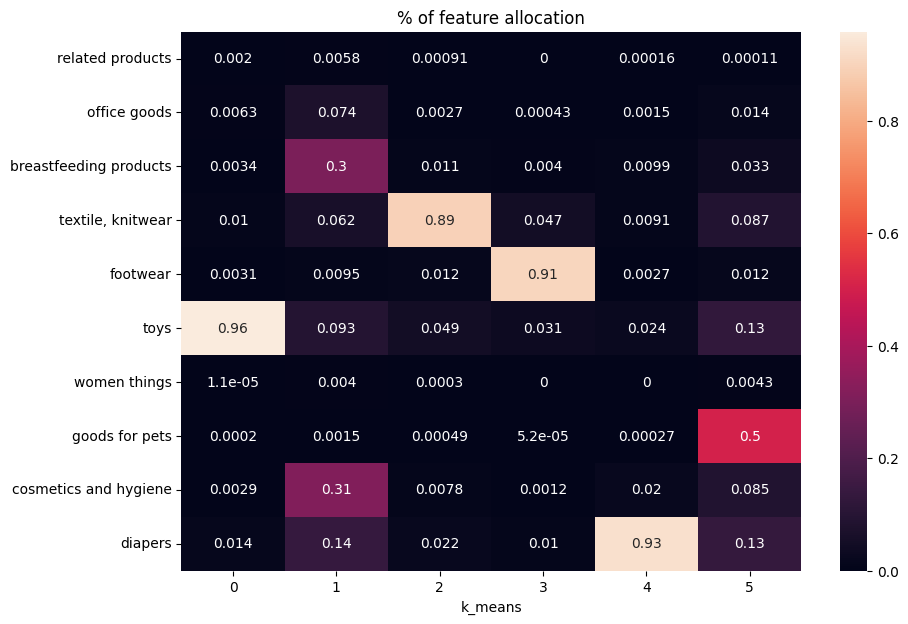

In [16]:
plt.figure(figsize=(10,7)); plt.title('% of feature allocation')
sns.heatmap(cat_stats.T, annot=True);

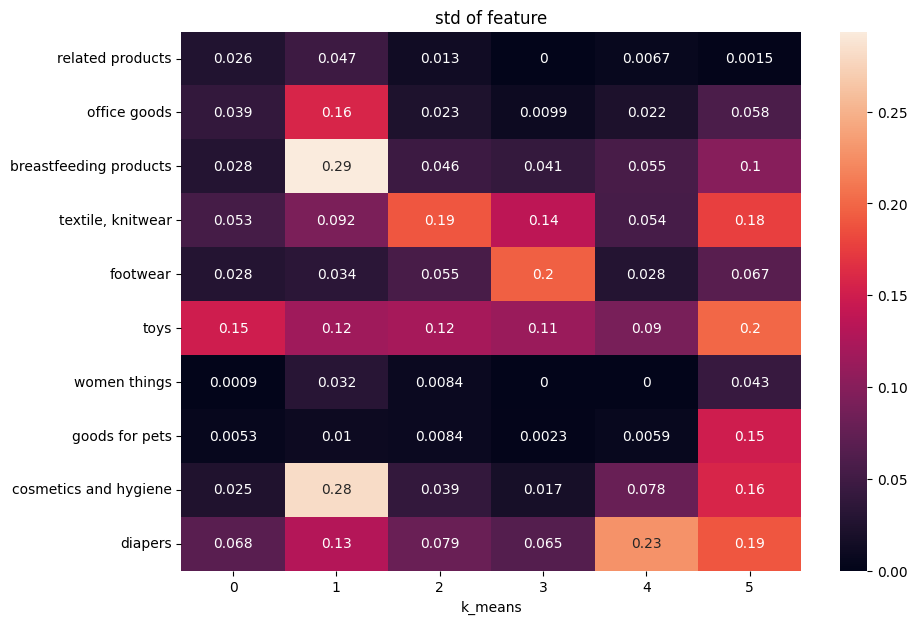

In [17]:
plt.figure(figsize=(10,7)); plt.title('std of feature')
sns.heatmap(mart.groupby(('k_means'))[categories].std().T, annot=True);

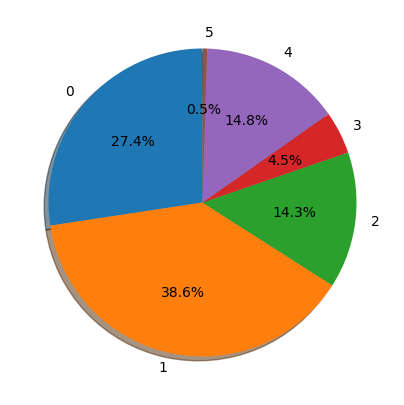

In [18]:
cluster_sizes = mart.groupby('k_means').count().values[:, 1]

plt.figure(figsize=(16,5))
plt.pie(cluster_sizes, labels=np.arange(len(cluster_sizes)), autopct='%1.1f%%', shadow=True, startangle=90);

In [19]:
mart.columns

Index(['successful_orders_count', 'avg_unique_items_per_order',
       'all_unique_items_purchased', 'avg_items_per_order',
       'all_items_purchased', 'avg_item_price', 'avg_unique_items_price',
       'all_items_price', 'avg_summed_cost_of_items_per_order',
       'total_shipping_charges', 'avg_shipping_charges',
       'total_service_charges', 'avg_service_charges', 'total_payment',
       'avg_payment', 'total_profit', 'avg_order_profit', 'avg_item_profit',
       'related products', 'baby food', 'office goods', 'books, disks',
       'breastfeeding products', 'textile, knitwear', 'footwear',
       'oversized goods', 'toys', 'women things', 'goods for pets',
       'cosmetics and hygiene', 'diapers', 'none', 'Oversized', 'Compact',
       'Unknown', 'number_canceled', 'avg_number_canceled', 'total_delivered',
       'avg_delivered', 'k_means'],
      dtype='object')

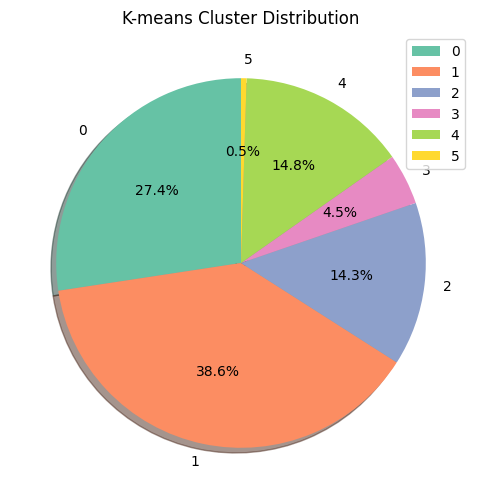

In [33]:
# Choose a color palette
colors = sns.color_palette('Set2')
# Get cluster sizes
cluster_sizes = mart.groupby('k_means').count().values[:, 1]
# Adjust figure size
plt.figure(figsize=(10, 6))
plt.pie(cluster_sizes, labels=np.arange(len(cluster_sizes)), autopct='%1.1f%%', shadow=True, startangle=90,
        colors=colors)
# Add a title
plt.title("K-means Cluster Distribution")
plt.legend(labels=np.arange(len(cluster_sizes)), loc='best')
plt.show()

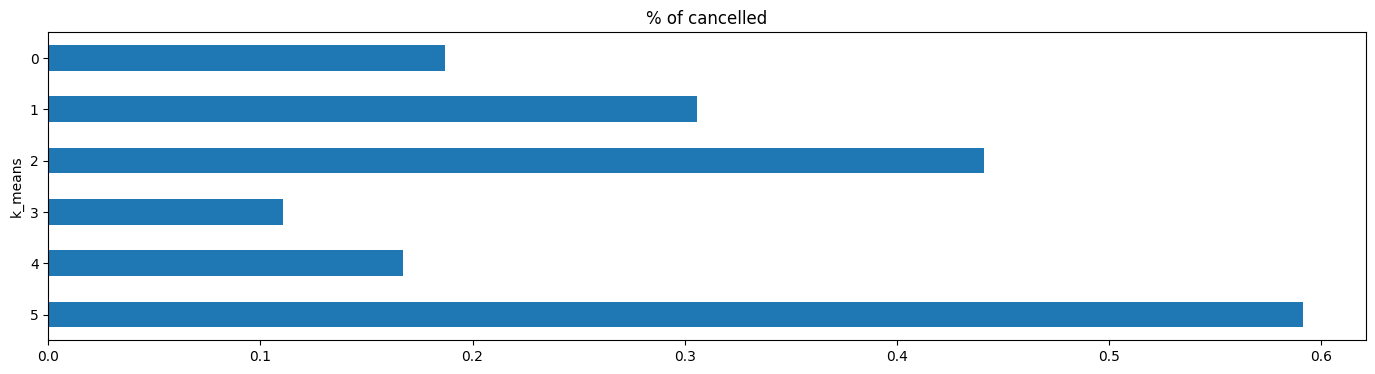

In [20]:
plt.figure(figsize=(17,4)); plt.title('% of cancelled')
tmp = mart.groupby('k_means')['number_canceled'].mean().sort_index(ascending=False)
tmp.plot.barh();

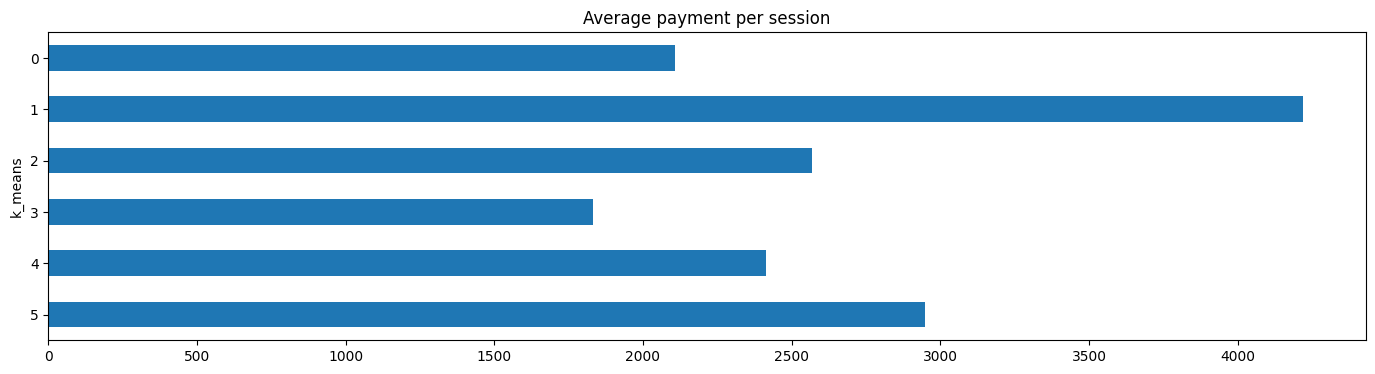

In [21]:
plt.figure(figsize=(17,4)); plt.title('Average payment per session')
tmp = mart.groupby('k_means')['avg_payment'].mean().sort_index(ascending=False)
tmp.plot.barh();

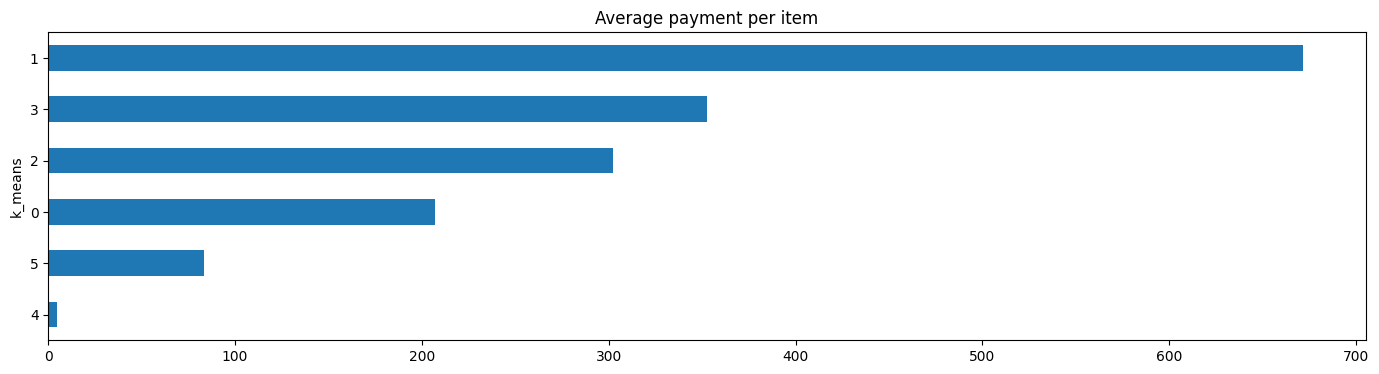

In [22]:
plt.figure(figsize=(17,4)); plt.title('Average payment per item')
tmp = mart.groupby('k_means')['avg_item_profit'].mean().sort_values()
tmp.plot.barh();

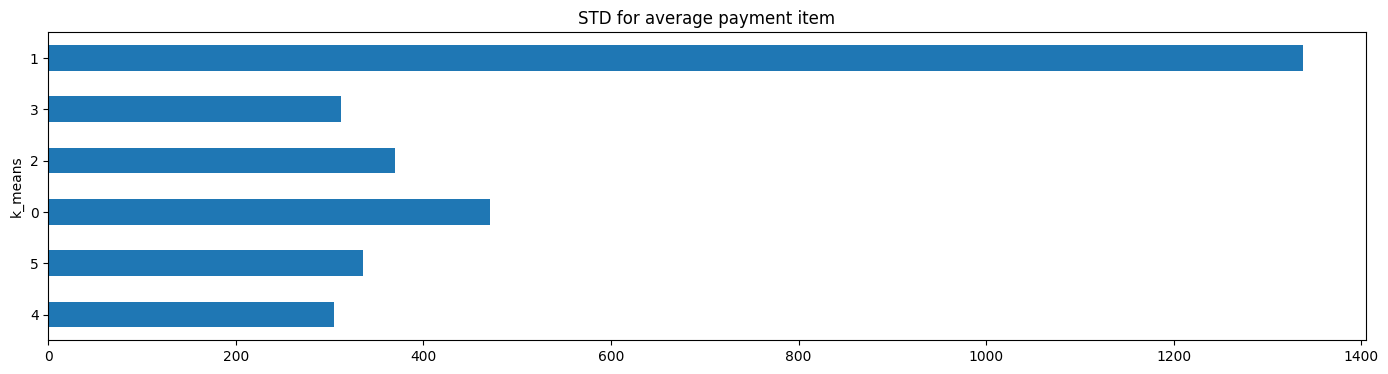

In [23]:
plt.figure(figsize=(17,4)); plt.title('STD for average payment item')
mart.groupby('k_means')['avg_item_profit'].std().loc[tmp.index].plot.barh();

In [24]:
rfm_clustered = pd.merge(mart['k_means'], rfm['RFM_Score'], on='phone').groupby(['k_means', 'RFM_Score']).size().unstack()
rfm_clustered

RFM_Score,3,4,5,6,7,8,9,10,11
k_means,,,,,,,,,
0,712,1902,2936,3021,1906,1044,440,72,40
1,934,1619,2649,4083,3238,2361,1502,357,245
2,88,389,975,1509,1408,1092,597,150,97
3,47,249,425,523,427,208,78,9,4
4,997,1239,1517,1426,711,370,147,76,25
5,19,27,47,49,28,27,6,8,2


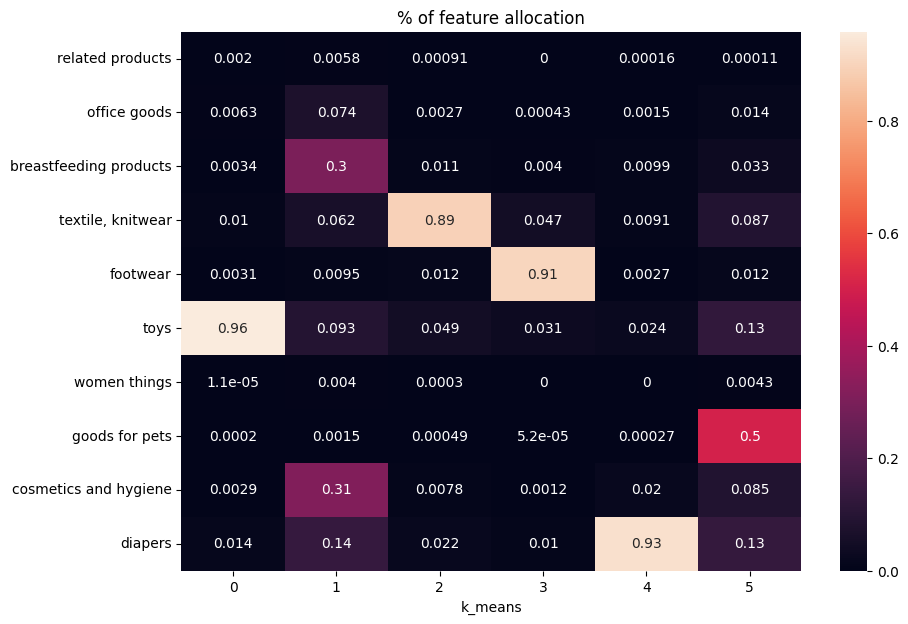

In [25]:
plt.figure(figsize=(10,7)); plt.title('% of feature allocation')
sns.heatmap(cat_stats.T, annot=True);

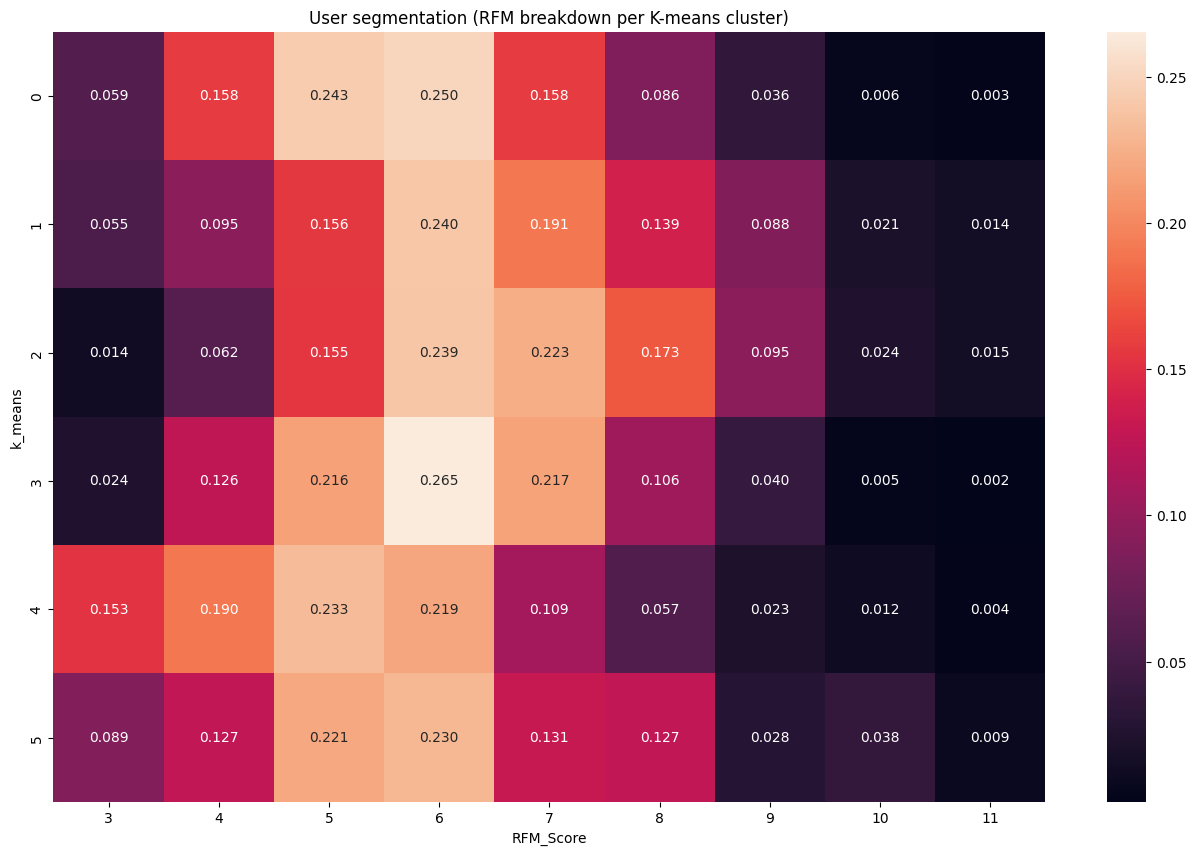

In [45]:
plt.figure(figsize=(16,10)); plt.title('User segmentation (RFM breakdown per K-means cluster)');
sns.heatmap((rfm_clustered.T / rfm_clustered.sum(axis=1)).T, annot=True, fmt='.3f');

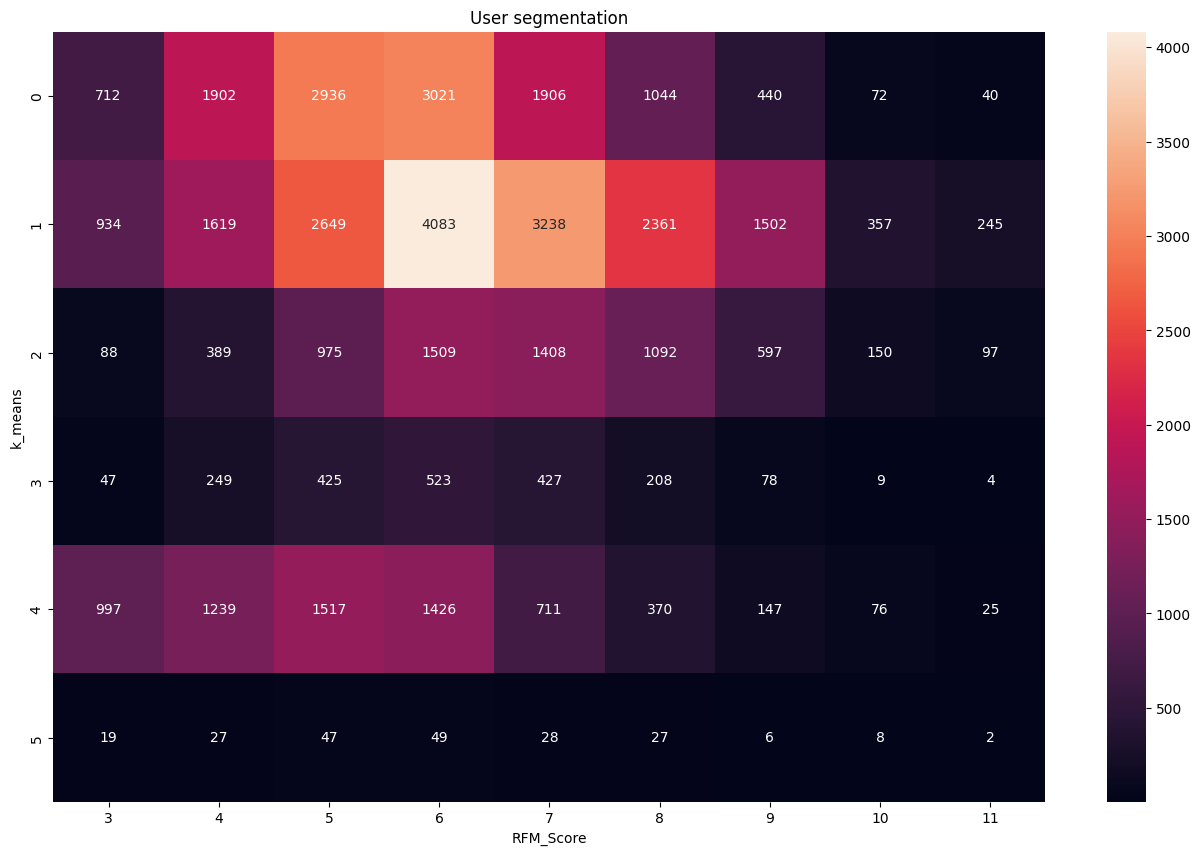

In [27]:
plt.figure(figsize=(16,10)); plt.title('User segmentation');
sns.heatmap(rfm_clustered, annot=True, fmt='g');

In [78]:
rfm_stats = pd.merge(mart, rfm, on='phone').groupby('RFM_Score')[categories].mean() # mean share of category

In [51]:
#rfm_stats = (rfm_stats.T / rfm_stats.sum(axis=1)).T

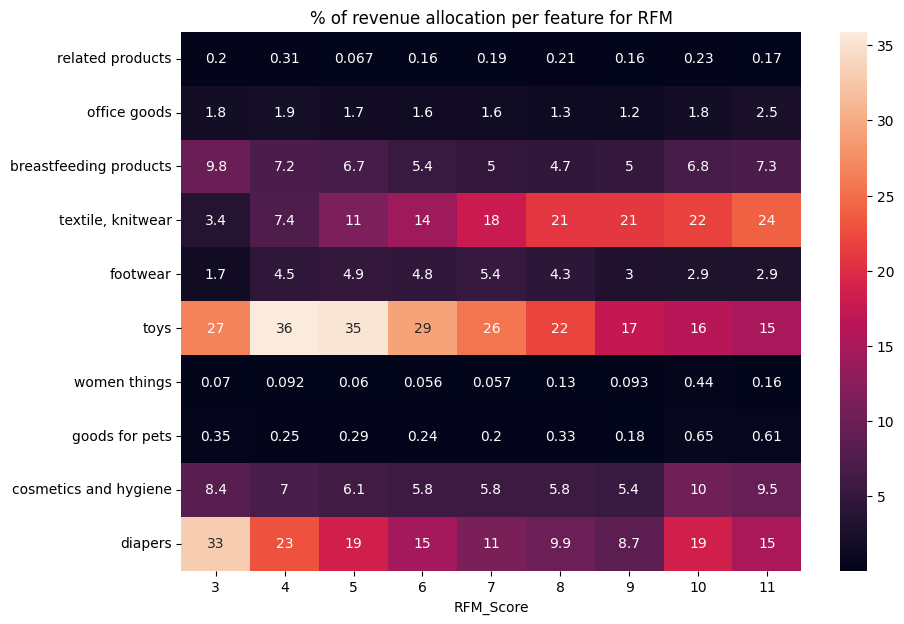

In [82]:
plt.figure(figsize=(10,7)); plt.title('% of revenue allocation per feature for RFM')
sns.heatmap(rfm_stats.T * 100, annot=True);